### Imports section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
# Using pandas ro load the dataset remotely
df = pd.read_csv("https://raw.githubusercontent.com/yqian000/OnlineReviewDetection/main/reviews.csv")

### Explore the dataset

In [3]:
df.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
df.isna().any()

category    False
rating      False
label       False
text_       False
dtype: bool

In [6]:
df.groupby("label").label.count()

label
CG    20216
OR    20216
Name: label, dtype: int64

### Univariate plots   
#### category plot

In [7]:
category_groups = df.groupby("category").category.count()
category_groups

category
Books_5                         4370
Clothing_Shoes_and_Jewelry_5    3848
Electronics_5                   3988
Home_and_Kitchen_5              4056
Kindle_Store_5                  4730
Movies_and_TV_5                 3588
Pet_Supplies_5                  4254
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Toys_and_Games_5                3794
Name: category, dtype: int64

In [8]:
category_index = category_groups.index
category_count = category_groups.values

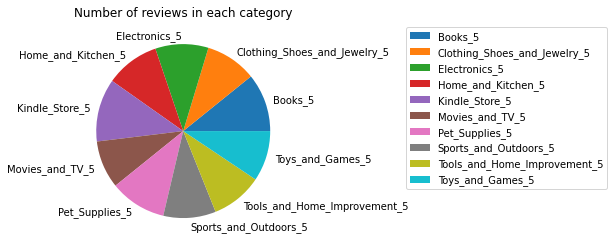

In [9]:
wedges,texts=plt.pie(category_count, labels = category_index)
plt.legend(wedges, category_index, bbox_to_anchor =(1.5, 0, 0, 1))
plt.title("Number of reviews in each category")
plt.show()

#### rating plot

In [10]:
df['rating'].describe()

count    40432.000000
mean         4.256579
std          1.144354
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

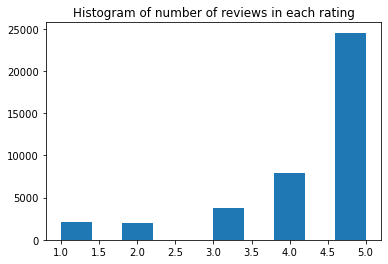

In [11]:
plt.title('Histogram of number of reviews in each rating')
plt.hist(df['rating'])
plt.show()

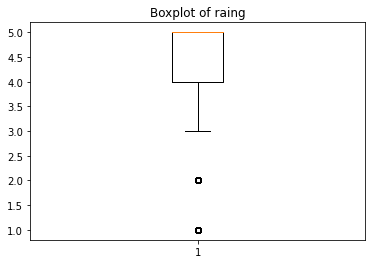

In [12]:
plt.title('Boxplot of raing')
plt.boxplot(df['rating'])
plt.show()

#### correlations between variables

<AxesSubplot:xlabel='rating'>

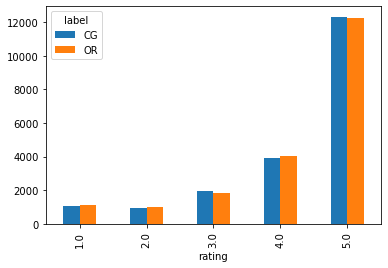

In [13]:
new_df=df[['rating','label']]
pd.pivot_table(new_df, index = 'rating', columns = 'label',
               aggfunc = lambda x: len(x)).plot.bar()

<AxesSubplot:xlabel='category'>

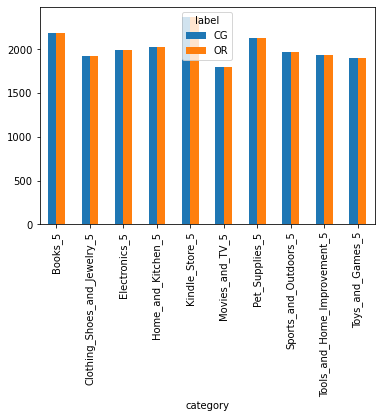

In [14]:
new_df=df[['category','label']]
pd.pivot_table(new_df, index = 'category', columns = 'label',
               aggfunc = lambda x: len(x)).plot.bar()

### Reviews length

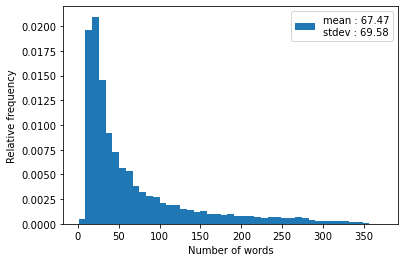

In [15]:
reviews_length_list = [len(i.split()) for i in df.text_]   #number of words in each review

plt.hist(reviews_length_list, density = True, bins = 45, label = "mean : " + str(np.round(np.mean(reviews_length_list), 2)) +
        "\nstdev : " + str(np.round(np.std(reviews_length_list), 2)))
plt.xlabel("Number of words")
plt.ylabel("Relative frequency")
plt.legend()
plt.show()

<AxesSubplot:xlabel='review_length'>

<Figure size 720x576 with 0 Axes>

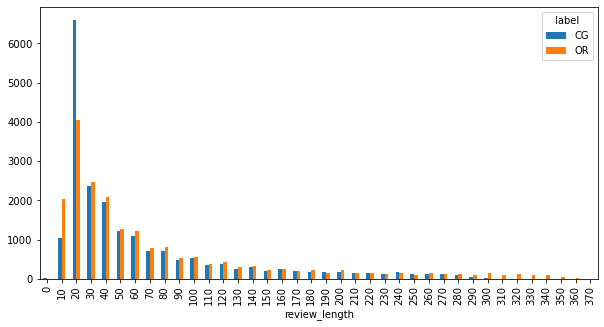

In [16]:
# round review length to neartest 10th for a simpler plot
new_list = [round(n, -1) for n in reviews_length_list]

plt.figure(figsize=(10, 8))
df['review_length'] = new_list
new_df=df[['review_length','label']]
pd.pivot_table(new_df, index = 'review_length', columns = 'label',
               aggfunc = lambda x: len(x)).plot.bar(figsize=(10, 5))


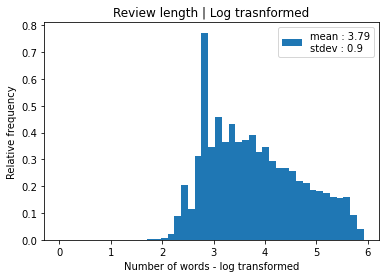

In [17]:
import math

reviews_length_list_log = []
for i in reviews_length_list:
    reviews_length_list_log.append(math.log(i))
    
plt.hist(reviews_length_list_log, density = True, bins = 45, label = "mean : " + str(np.round(np.mean(reviews_length_list_log), 2)) +
        "\nstdev : " + str(np.round(np.std(reviews_length_list_log), 2)))
plt.xlabel("Number of words - log transformed")
plt.ylabel("Relative frequency")
plt.title("Review length | Log trasnformed")
plt.legend()
plt.show()

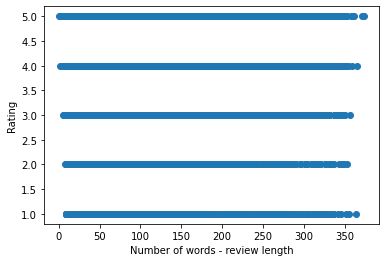

In [18]:
'''Q : Does review length correlate with its rating?'''  
'''A : No correlation'''
plt.scatter( reviews_length_list, df.rating)
plt.xlabel("Number of words - review length")
plt.ylabel("Rating")
plt.show()

### Basic sentiment analysis of data 

Most of reviews are somewhat on the positive side. 

In [19]:
'''Some sentiment analysis'''
#sentiment polarity has values ranging from -1 to 1. +1 and -1 means 
# most positive and most negative respectively. 

from textblob import TextBlob

sentiment_list = []

for i in range (len(df)):
    conv = TextBlob(df.text_[i])
    sentiment_list.append(conv.sentiment.polarity)

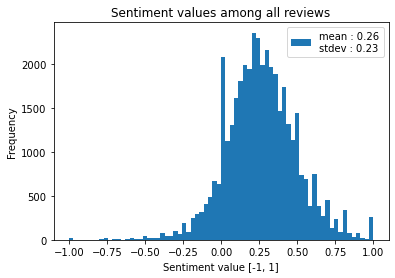

In [20]:
plt.hist(sentiment_list, bins = 70, label = "mean : " + str(np.round(np.mean(sentiment_list), 2)) +
        "\nstdev : " + str(np.round(np.std(sentiment_list), 2)))
plt.title("Sentiment values among all reviews")
plt.xlabel("Sentiment value [-1, 1]")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<AxesSubplot:xlabel='sentiment'>

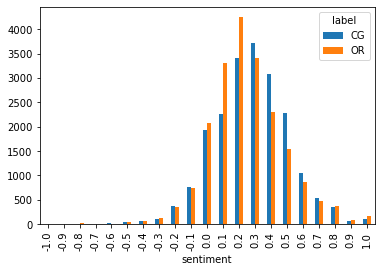

In [21]:
# round review length to 1 decimal point for a simpler plot
new_list = [round(n, 1) for n in sentiment_list]

df['sentiment'] = new_list
new_df=df[['sentiment','label']]
pd.pivot_table(new_df, index = 'sentiment', columns = 'label',
               aggfunc = lambda x: len(x)).plot.bar()

In [30]:
CG_sent_list = [] ; OR_sent_list = []

for i in range (len(df)):
    if df.label[i] == 'CG':
        conv = TextBlob(df.text_[i])
        CG_sent_list.append(conv.sentiment.polarity)
    elif df.label[i] == 'OR':
        conv = TextBlob(df.text_[i])
        OR_sent_list.append(conv.sentiment.polarity)
    else:
        break

In [31]:
from scipy.stats import ks_2samp
ks_2samp(CG_sent_list, OR_sent_list)

KstestResult(statistic=0.10234467748318171, pvalue=1.2465852541580392e-92)

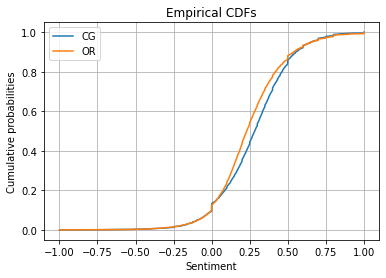

In [40]:
from statsmodels.distributions.empirical_distribution import ECDF
datain = CG_sent_list ; dataout = OR_sent_list
ecdf1 = ECDF(datain) ; ecdf2 = ECDF(dataout)

plt.plot(ecdf1.x,ecdf1.y, label = "CG")
plt.plot(ecdf2.x, ecdf2.y, label = "OR")
plt.grid(0.05)
plt.legend()
plt.title("Empirical CDFs")
plt.xlabel("Sentiment")
plt.ylabel("Cumulative probabilities")
plt.show()

### Explore data using k-means 

inspired by https://www.youtube.com/watch?v=ORpDAUQUnkU&t=859s

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

'''Preprocessing using tf-idf'''
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df.text_)

'''k-means'''
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster'] = model.labels_      #append column to df 


print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster", i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (terms[j], end = " ")
    print('\n------------\n')

Cluster centroids: 

Cluster 0
great product works price easy use used recommend good nice little happy small love quality 
------------

Cluster 1
like good great use little time nice really book easy used work don does small 
------------

Cluster 2
comfortable fit shoes nice wear great love pair soft material shoe little fits size bought 
------------

Cluster 3
loves son daughter bought toy christmas great play gift absolutely little plays pieces fun music 
------------

Cluster 4
love dogs feel great look cats series easy characters perfect book good use like nice 
------------

Cluster 5
size fit wear ordered perfect little small shoes large fits perfectly 10 comfortable material nice 
------------

Cluster 6
story characters book read good author liked series great interesting love enjoyed loved reading told 
------------

Cluster 7
pieces game sturdy fun play kids great puzzle easy toy loves set little son daughter 
------------

Cluster 8
movie acting good watch story great lo

#### k-means on all products seem to group texts by product categories. But we want to know any keywords that can be used to detect CG/OR reviews.

#### Next step is to pick a product category (e.g. book), then run k-means on that category to observe any outstanding words.

In [22]:
category = "Books_5"

#------------------------------------------------------------------------------------

'''Preprocessing using tf-idf'''
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(df.loc[df['category'] == category].text_)

'''k-means'''
k = 2
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)


print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster", i)
    for j in order_centroids[i, :15]: #print out 10 feature terms of each cluster
        print (terms[j], end = " ")
    print('\n------------\n')

Cluster centroids: 

Cluster 0
book read story good just great books love characters like reading series author interesting time 
------------

Cluster 1
book read characters good story great love series recommend developed enjoyed books loved written told 
------------



### Word clouds

**Note the filtering of stopwords**

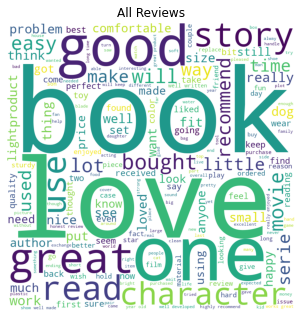

In [23]:
'''For all reviews'''

from wordcloud import WordCloud, STOPWORDS

accu = ""
stopwords = set(STOPWORDS)

for review in df.text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("All Reviews")
 
plt.show()

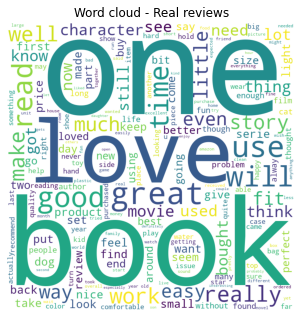

In [24]:
'''Next, lets do the same but split into using OR and CG reviews'''

# OR
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[df['label'] == 'OR'].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Real reviews")
 
plt.show()

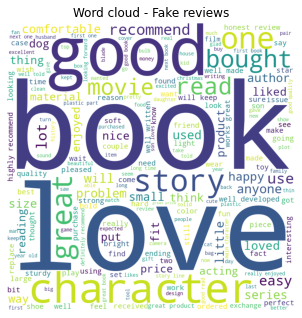

In [25]:
# CG
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[df['label'] == 'CG'].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Fake reviews")
 
plt.show()

### It is unclear if there is any difference. I will filter only the "Electronics" products and see the word clouds for OR and CG reviews. 

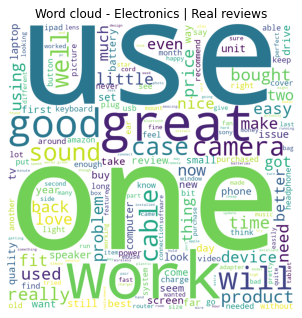

In [26]:
# Electronics - OR
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[(df['category'] == 'Electronics_5')].loc[(df['label'] == 'OR')].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Electronics | Real reviews")
 
plt.show()

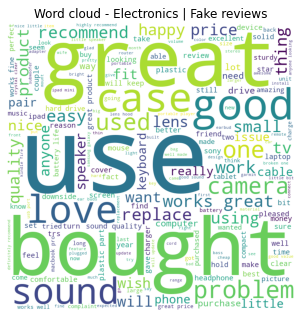

In [27]:
# Electronics - CG
accu = ""
stopwords = set(STOPWORDS)

for review in df.loc[(df['category'] == 'Electronics_5')].loc[(df['label'] == 'CG')].text_:
    tokens = review.split()    #split sentence str into individual words
    
    for i in range (len(tokens)):      #lowercasing 
        tokens[i] = tokens[i].lower()
    accu += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,
                min_font_size = 10).generate(accu)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word cloud - Electronics | Fake reviews")
 
plt.show()

### tf-idf

**For memory efficiency, split data by categories**

Inspired by https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

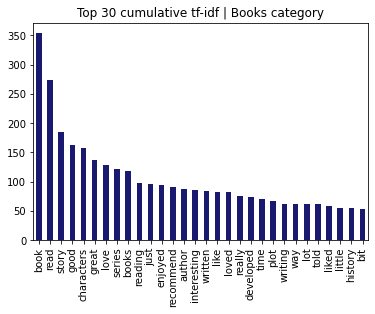

In [35]:
'''getting "books" category subset'''

vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df.loc[df['category'] == 'Books_5'].text_)

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

df_tfidf = pd.DataFrame(denselist, columns = feature_names)

sum_of_cols = df_tfidf.sum(axis = 0)

#-----------------plot-------------------------------

top_n = 30
ax = sum_of_cols.nlargest(top_n).plot.bar(y = 'Cumulative tf-idf', color = 'midnightblue')
plt.title("Top " + str(top_n) + " cumulative tf-idf | Books category")
plt.show()

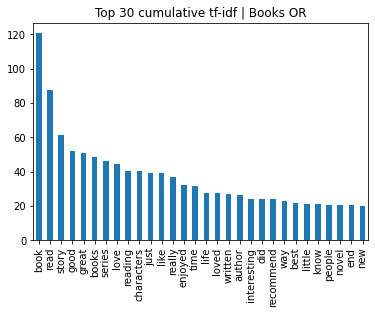

In [29]:
'''Books OR  '''

vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df.loc[(df['category'] == 'Books_5')].loc[(df['label'] == 'OR')].text_)

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

df_tfidf = pd.DataFrame(denselist, columns = feature_names)

sum_of_cols = df_tfidf.sum(axis = 0)

#-----------------plot-------------------------------

top_n = 30
ax = sum_of_cols.nlargest(top_n).plot.bar(y = 'Cumulative tf-idf')
plt.title("Top " + str(top_n) + " cumulative tf-idf | Books OR")
plt.show()

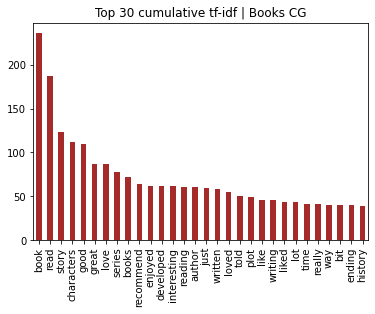

In [34]:
'''Books CG  '''

vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df.loc[(df['category'] == 'Books_5')].loc[(df['label'] == 'CG')].text_)

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

df_tfidf = pd.DataFrame(denselist, columns = feature_names)

sum_of_cols = df_tfidf.sum(axis = 0)

#-----------------plot-------------------------------

top_n = 30
ax = sum_of_cols.nlargest(top_n).plot.bar(y = 'Cumulative tf-idf', color = "brown")
plt.title("Top " + str(top_n) + " cumulative tf-idf | Books CG")
plt.show()